In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*pyarrow.*")
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
import seaborn as sns

In [38]:
df0 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
df0.shape

(1470, 35)

In [40]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
object_columns = df0.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 51.8+ KB
None


In [42]:
column_list = df0.columns.tolist()
print(column_list)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Age	Attrition	BusinessTravel	DailyRate	Department	DistanceFromHome	Education	EducationField	EmployeeCount
EmployeeNumber	EnvironmentSatisfaction	Gender	HourlyRate	JobInvolvement	JobLevel	JobRole	JobSatisfaction	MaritalStatus
MonthlyIncome	MonthlyRate	NumCompaniesWorked	Over18	OverTime	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction
StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	YearsInCurrentRole
YearsSinceLastPromotion	YearsWithCurrManager

In [43]:
df0.duplicated().sum()

0

In [44]:
has_null = df0.isnull().values.any()

print(has_null)

False


In [45]:
df0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [46]:
##NUMBER OF DISTINCT VALUES FOR EACH COLUMN
for column in df0.columns:
    num_distinct_values = len(df0[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Age: 43 distinct values
Attrition: 2 distinct values
BusinessTravel: 3 distinct values
DailyRate: 886 distinct values
Department: 3 distinct values
DistanceFromHome: 29 distinct values
Education: 5 distinct values
EducationField: 6 distinct values
EmployeeCount: 1 distinct values
EmployeeNumber: 1470 distinct values
EnvironmentSatisfaction: 4 distinct values
Gender: 2 distinct values
HourlyRate: 71 distinct values
JobInvolvement: 4 distinct values
JobLevel: 5 distinct values
JobRole: 9 distinct values
JobSatisfaction: 4 distinct values
MaritalStatus: 3 distinct values
MonthlyIncome: 1349 distinct values
MonthlyRate: 1427 distinct values
NumCompaniesWorked: 10 distinct values
Over18: 1 distinct values
OverTime: 2 distinct values
PercentSalaryHike: 15 distinct values
PerformanceRating: 2 distinct values
RelationshipSatisfaction: 4 distinct values
StandardHours: 1 distinct values
StockOptionLevel: 4 distinct values
TotalWorkingYears: 40 distinct values
TrainingTimesLastYear: 7 distinct va

In [47]:
count_att_yes = df0[(df0['Attrition'] == 'Yes')]
count_att_no = df0[(df0['Attrition'] == 'No')]
count_att_yes.shape


(237, 35)

In [48]:
count_att_no.shape

(1233, 35)

                                                 PERSONAL DEMOGRAPHIC

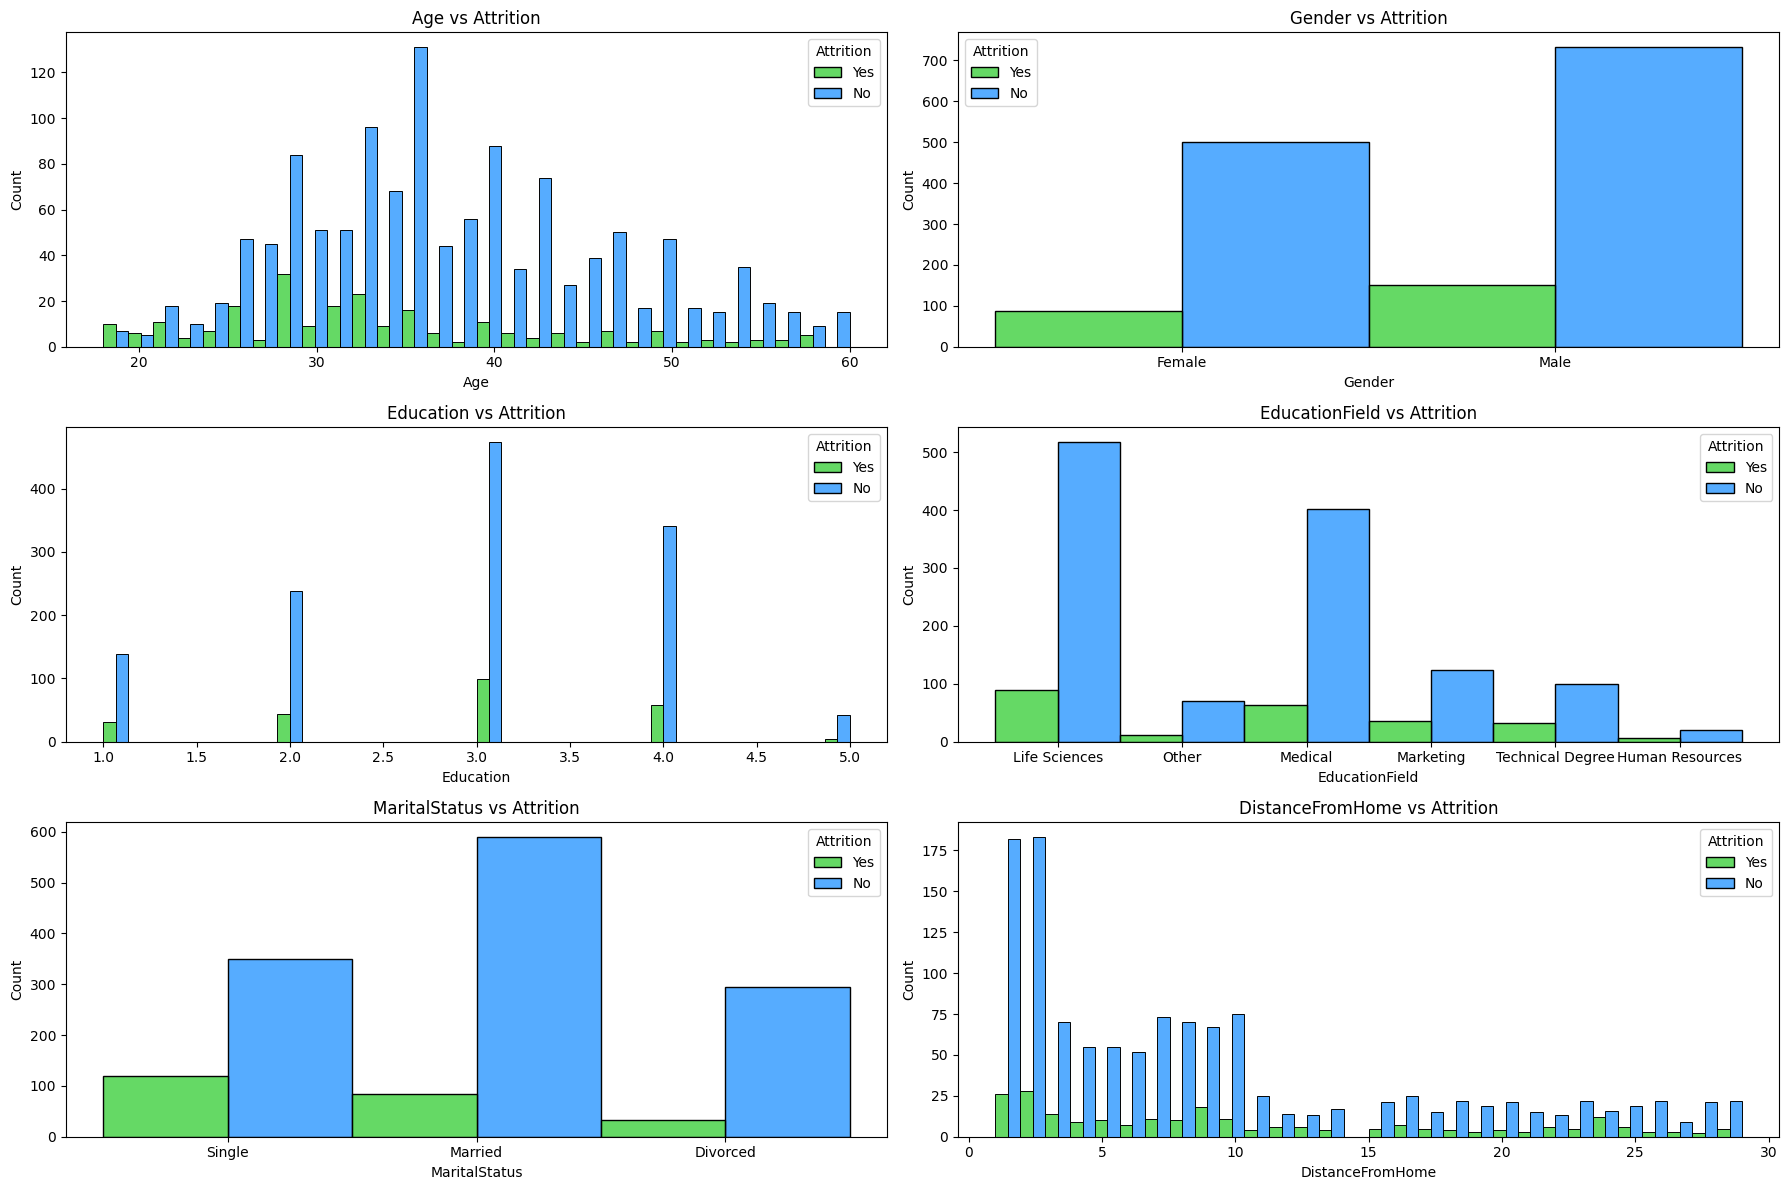

In [49]:

# Personal Demographic columns of employees to plot against 'Attrition'

# List of columns to plot against 'Attrition'
columns = ['Age', 'Gender', 'Education', 'EducationField', 'MaritalStatus', 'DistanceFromHome']

# Calculate the number of rows needed
num_cols = 2
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration if it's 2D
axes = axes.flatten()

# Loop through each column and create the histogram
for i, col in enumerate(columns):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition', ha='center')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



##  THESE ANALYSES MAY BE IRRELEVANT
## ::

## 

## EITHER DATA IS NOT RELEVANT
## OR 12TH STANDARD, GRADUATION AND POST GRADUATION ATTRITION ARE HIGH BECAUSE THEY APPEAR TO BE IN TRANSITIONAL OR RISK TAKING PHASE OF THEIR LIVES

## COMPANY BELONGS TO HEALTH SECTOR


## PERCENTAGE DROPOUT OF EACH EDUCATION LEVEL
## THIS DOESNT PROVIDE MUCH INSIGHT BECAUSE MORE OR LESS ATTRITION IS IN THE RATE OF 10-18% AND WE HAVE ONLY 1470 ENTRIES IN THIS DATASET
## RANKING
## 10TH =  DEGREE, = 12 = POST GRADUATE > DOC?POSTDOC 

## THIS IS THE SAME PERCENTAGE RATIO IN EACH EDUCATIONAL BACKGROUND
## MEDICAL, LIFE SCIENCES, HAVE THE HIGHEST NUMBER OF EMPLOYEES AND LOWEST PERCENTAGE (BELOW 20) ATTRITION AMONG ALL.
## TECHNICAL DEGREE AND MARKETING HAVE HIGHER ATTRITION RATE AND NO> OF EMPLOYEES ARE ABOVE 220. THIS AREA IS TO BE FOCUSED. MAJOR CHANGES ARE RECOMMENDED HERE.
## ALTHOUGH PERCENTAGE IS HIGHEST IN HR. THE STRENGTH IS 27. MINOR CHANGES ARE NEEDED.

## The attrition is mostly seen below an income of Rs 12500 irrespective of distance.
## Infact the part with the most inflation lie within low monthly rate and farther distance.
## Also people are less likely to leave for higher pay even if the distance is very far.



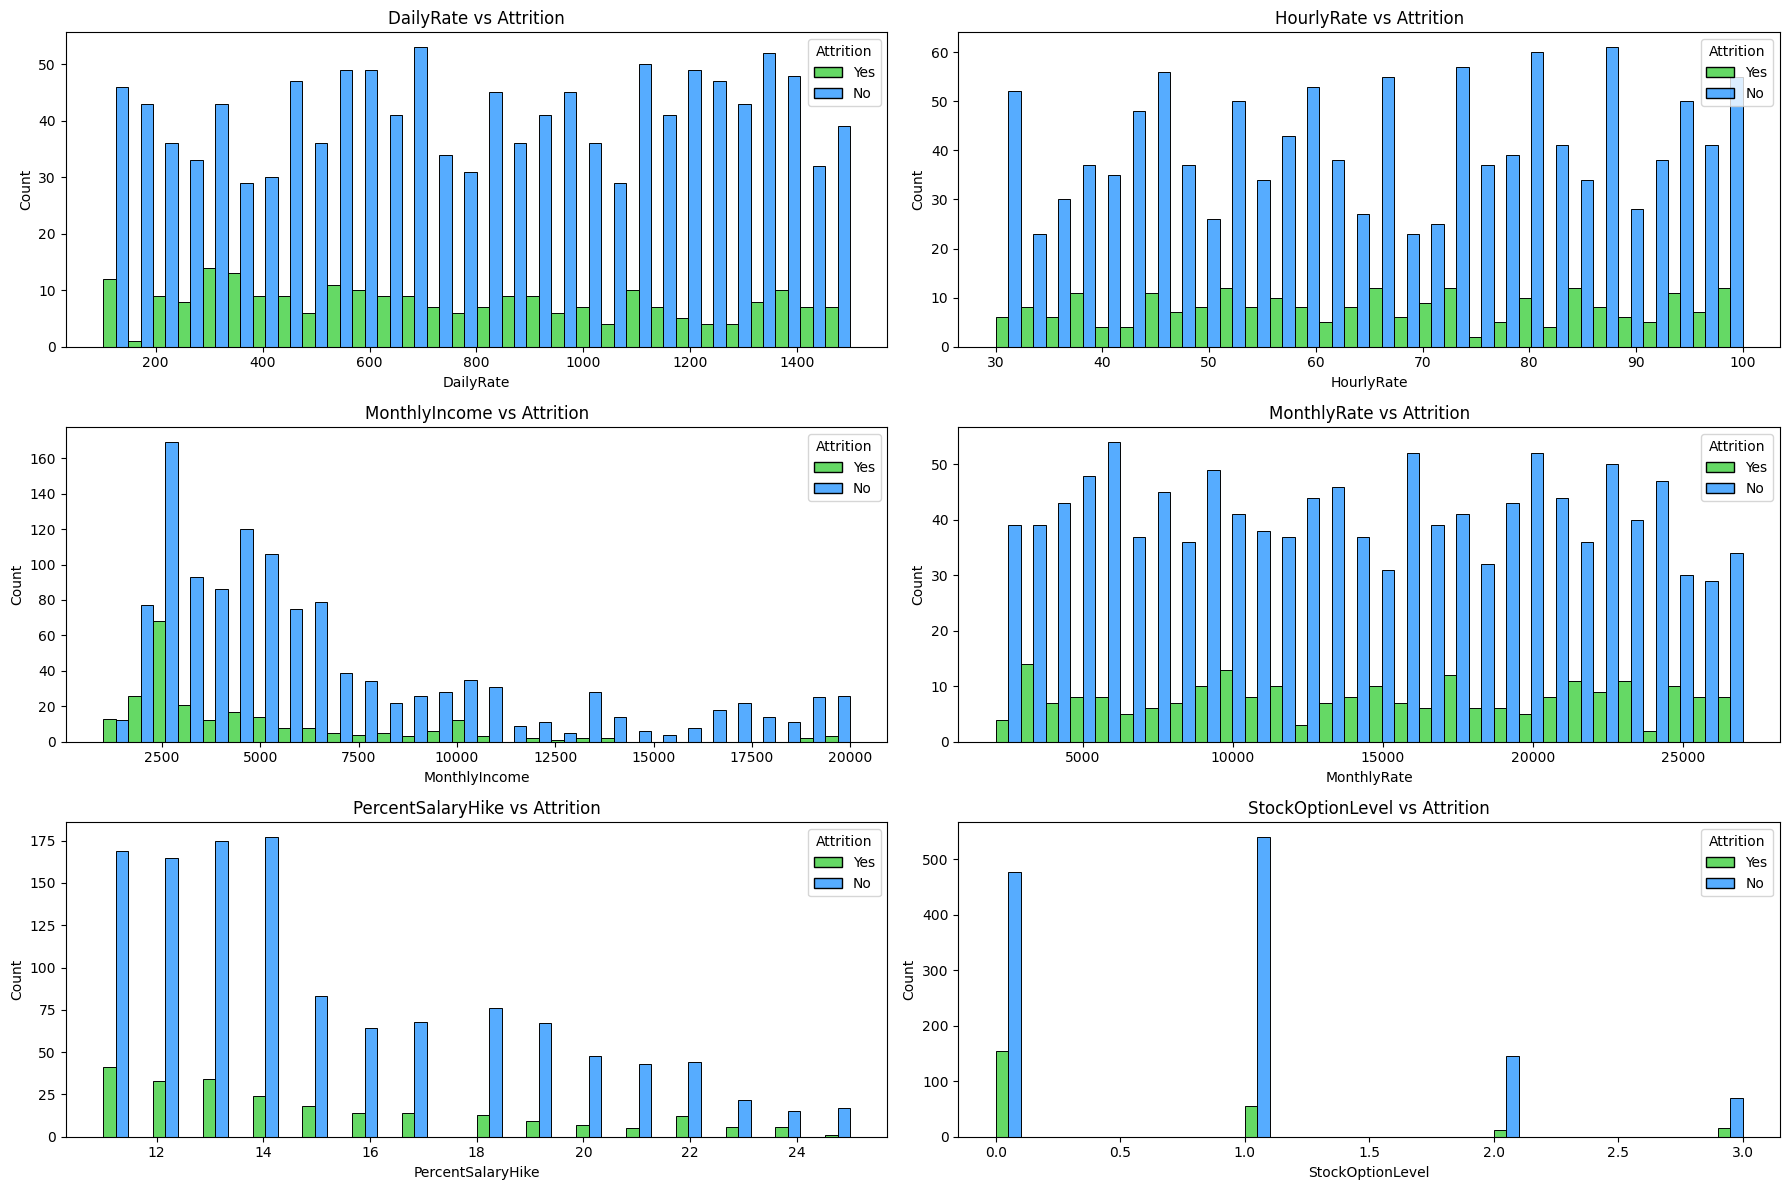

In [50]:

# List of columns to plot against 'Attrition'
columns = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel']

# Calculate the number of rows needed
num_cols = 2
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration if it's 2D
axes = axes.flatten()

# Loop through each column and create the histogram
for i, col in enumerate(columns):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition', ha='center')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

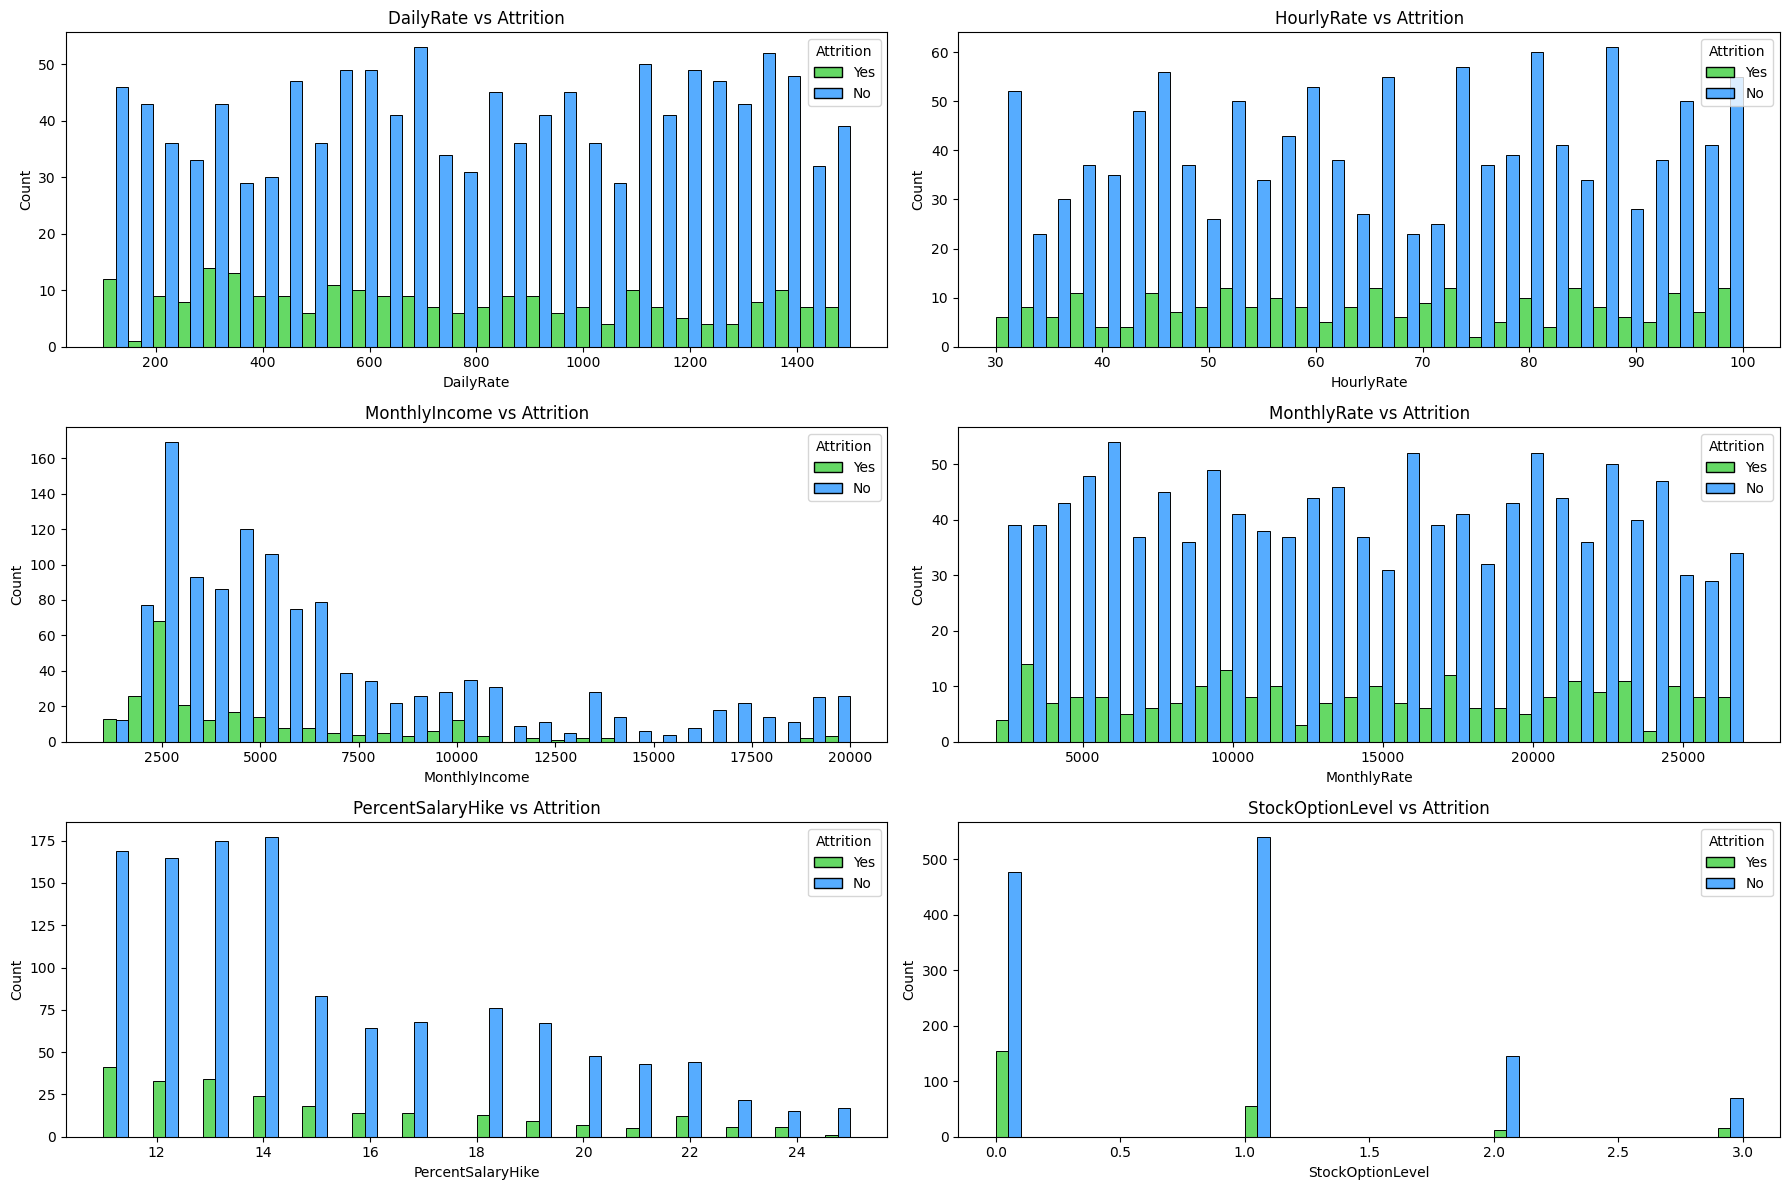

In [51]:
# List of columns to plot against 'Attrition'
demographic = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel']

# Calculate the number of rows needed
num_cols = 2
num_rows = len(demographic ) // num_cols + (len(demographic ) % num_cols > 0)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration if it's 2D
axes = axes.flatten()

# Loop through each column and create the histogram
for i, col in enumerate(demographic):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition', ha='center')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

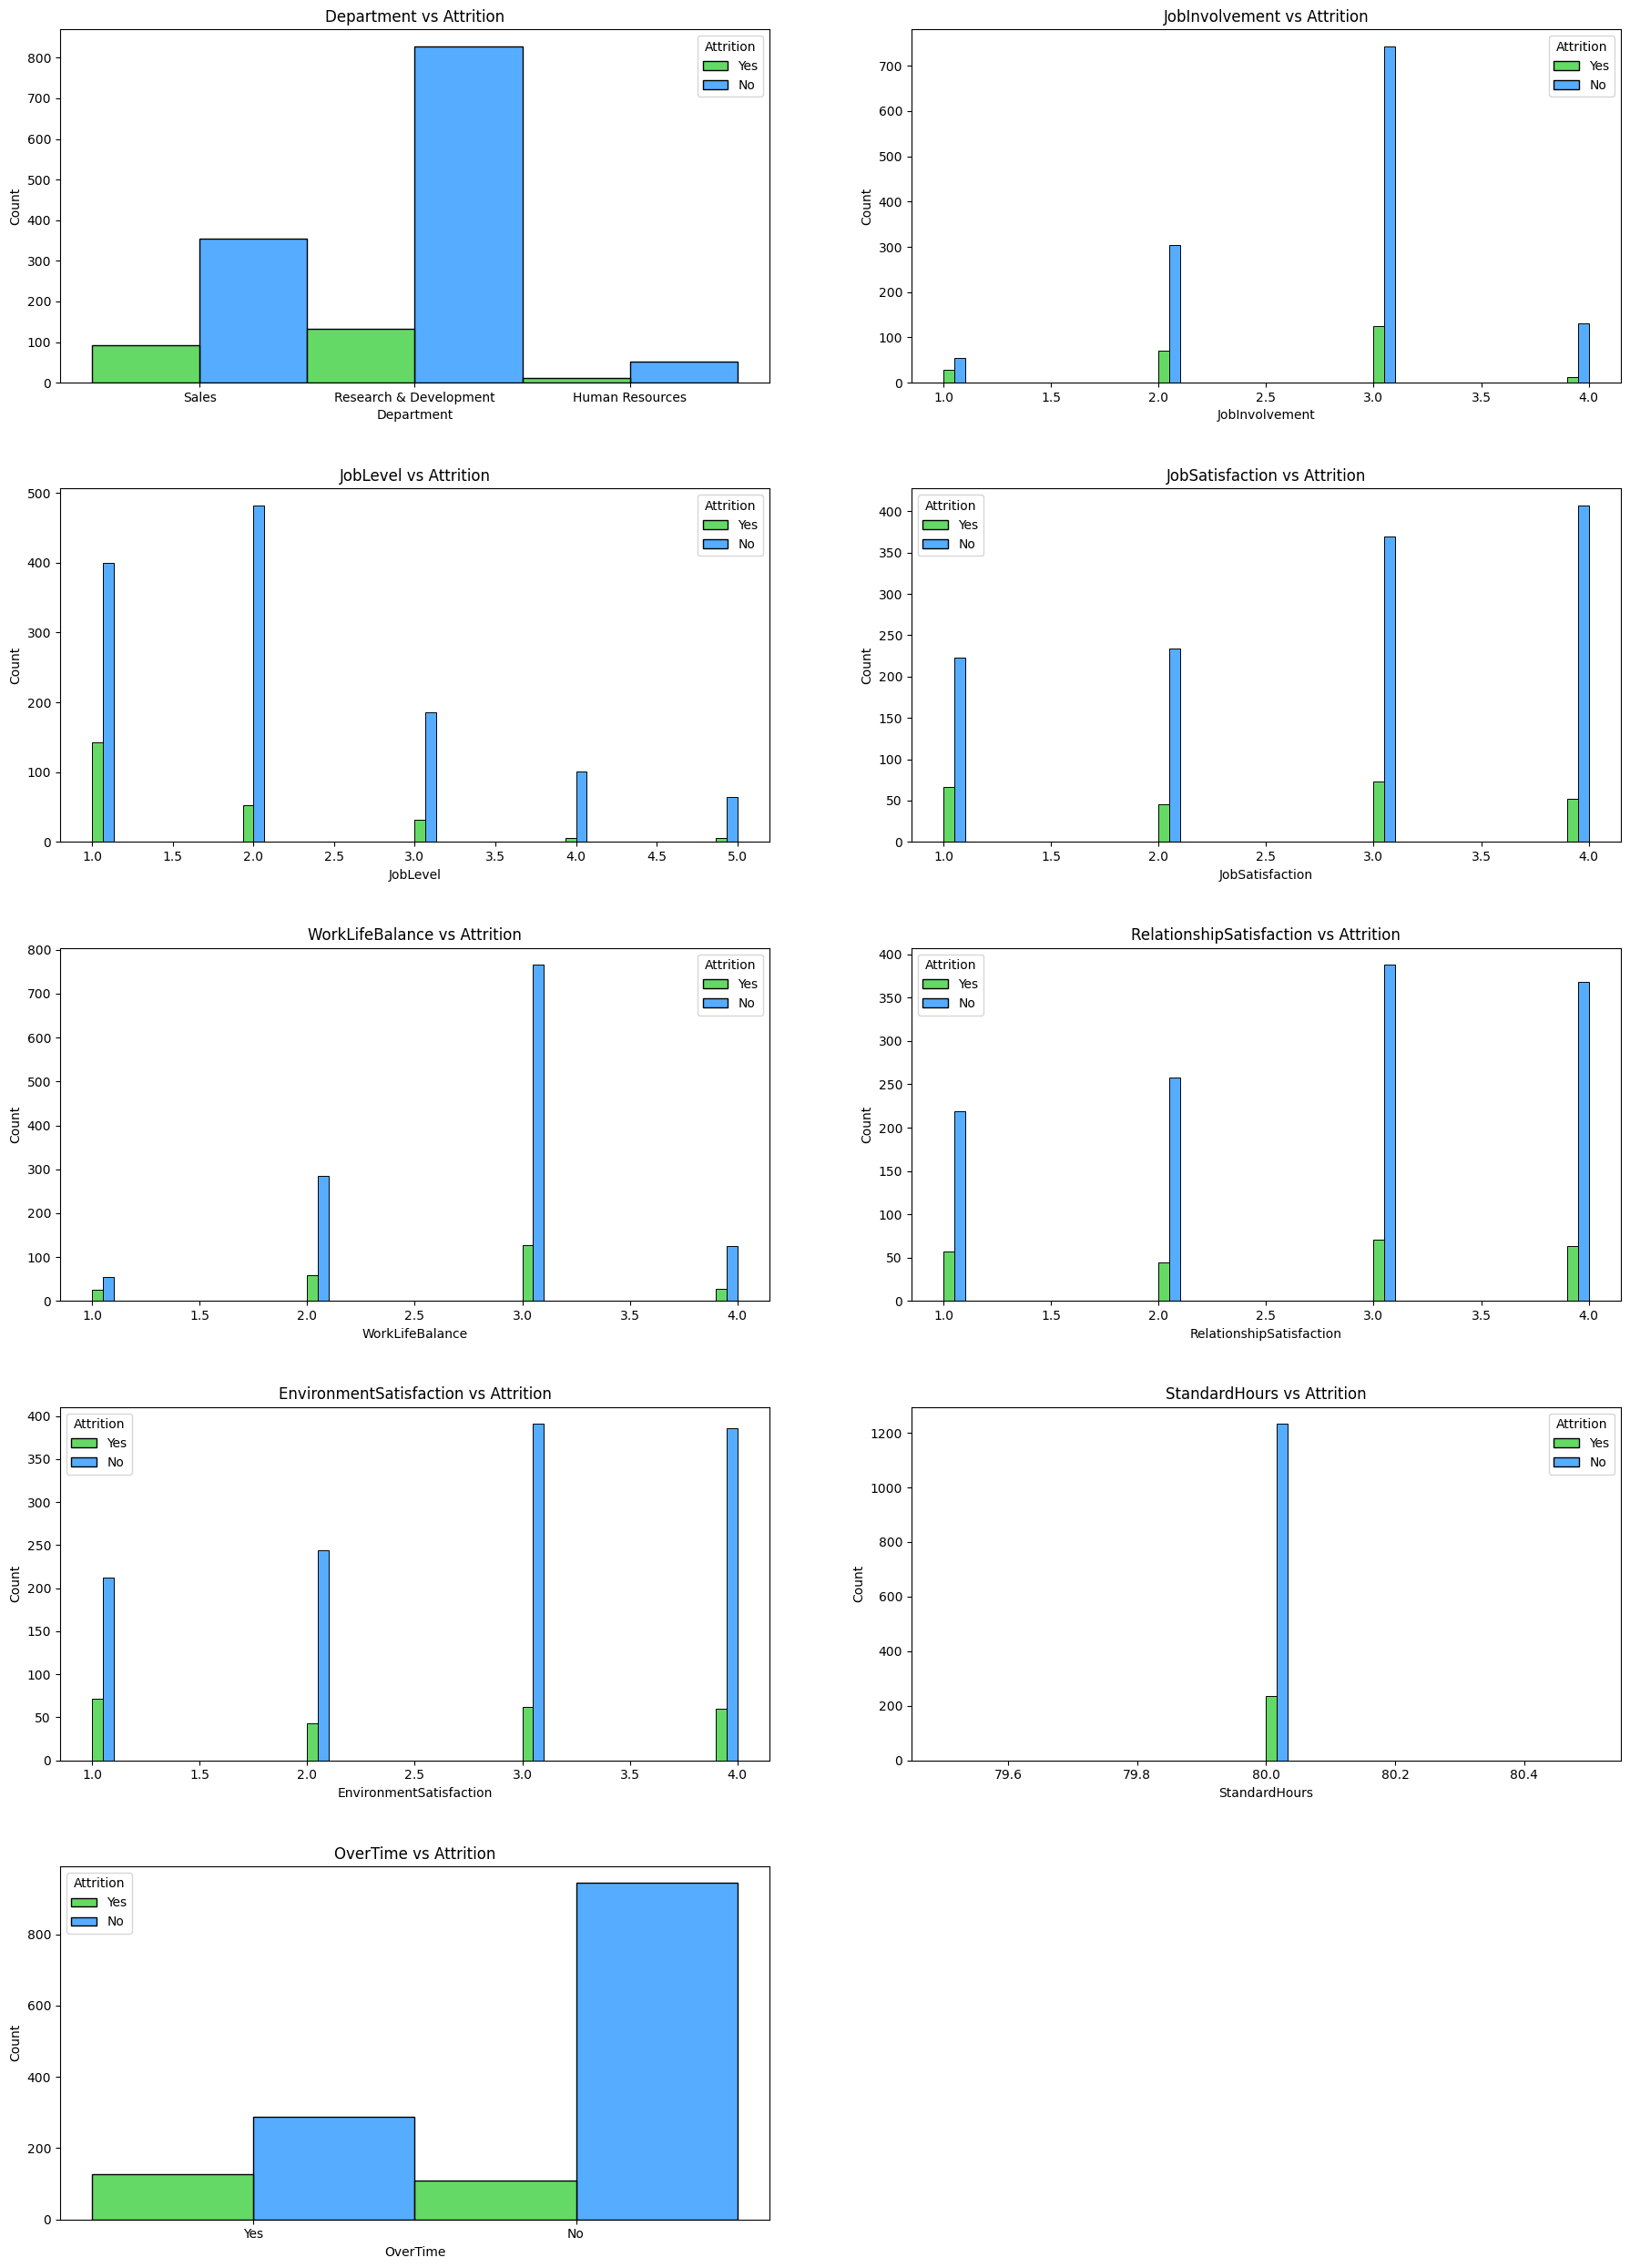

In [52]:
# List of columns to plot against 'Attrition', excluding 'JobRole'
personal_XP = ['Department', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance', 
               'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'StandardHours', 'OverTime']

# Determine how many charts need two per row
num_regular_cols = len(personal_XP)
num_rows = num_regular_cols // 2 + num_regular_cols % 2  # Rows for regular columns

# Create subplots for regular columns
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create the histograms
for plot_index, col in enumerate(personal_XP):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[plot_index])
    axes[plot_index].set_title(f'{col} vs Attrition', ha='center')

# Remove any unused subplots if the number of regular columns is odd
if num_regular_cols % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()


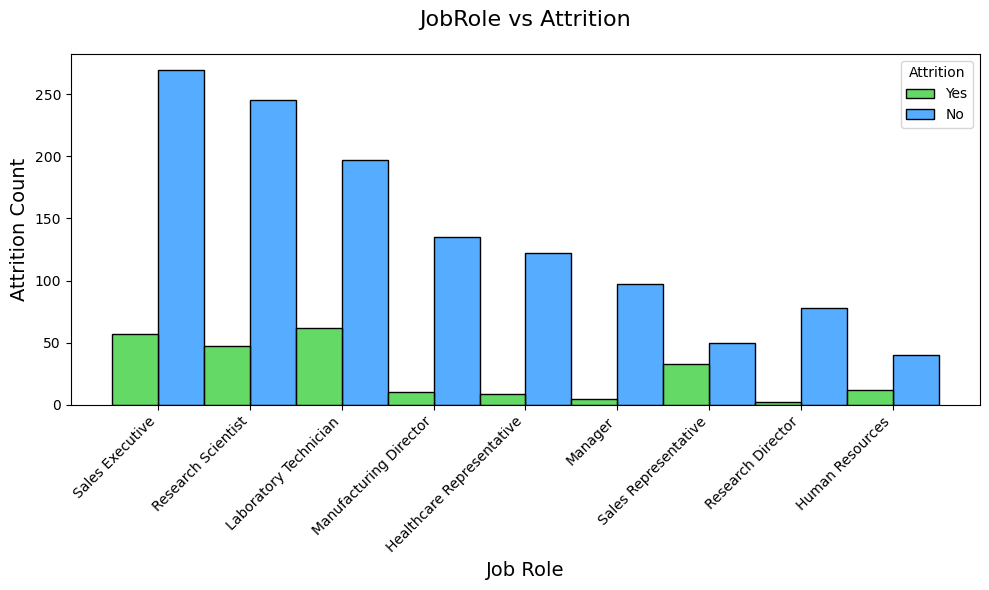

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='JobRole', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

# Set title and labels with appropriate font sizes
plt.title('JobRole vs Attrition', fontsize=16, ha='center', pad=20)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Attrition Count', fontsize=14)

# Rotate x-axis labels and adjust alignment for clarity
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 'Department', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'StandardHours', 'OverTime'

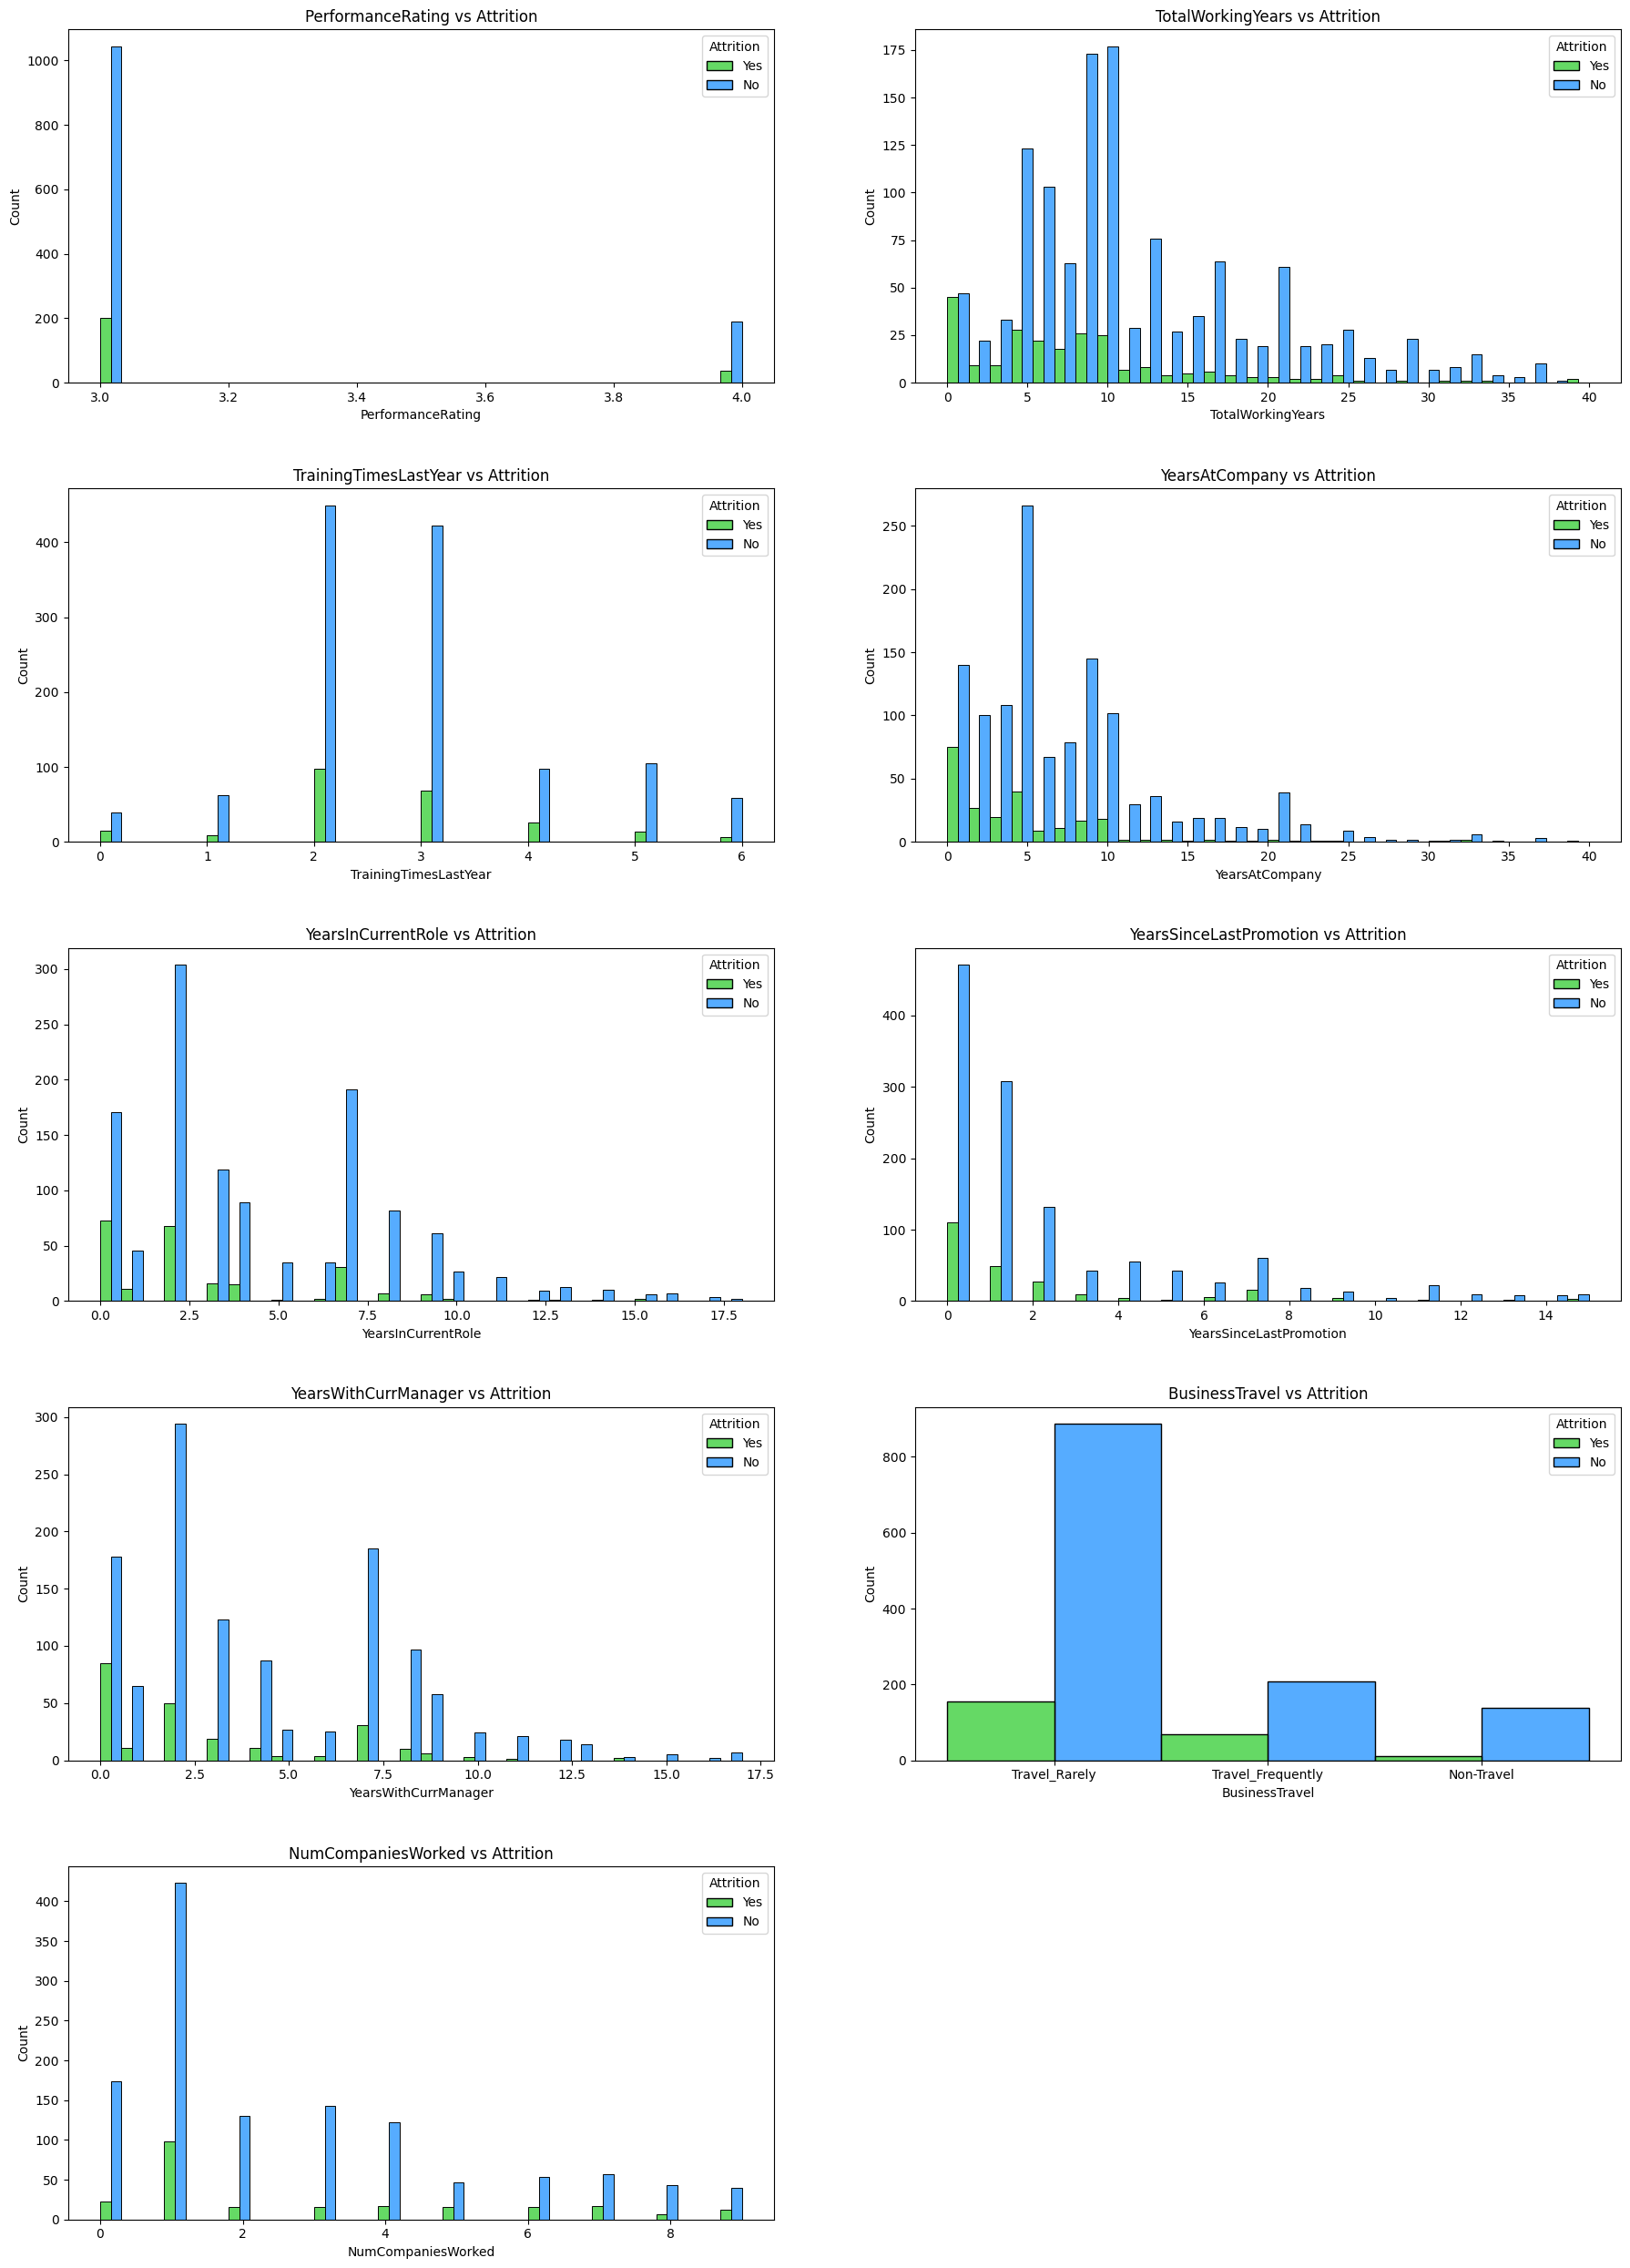

In [54]:
# List of columns to plot against 'Attrition', excluding 'JobRole'
Evaluation_indices = ['PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel', 'NumCompaniesWorked']

# Determine how many charts need two per row
num_regular_cols = len(Evaluation_indices)
num_rows = num_regular_cols // 2 + num_regular_cols % 2  # Rows for regular columns

# Create subplots for regular columns
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create the histograms
for plot_index, col in enumerate(Evaluation_indices):
    sns.histplot(data=df0, x=col, hue='Attrition', bins=30, multiple='dodge', 
                 palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black', ax=axes[plot_index])
    axes[plot_index].set_title(f'{col} vs Attrition', ha='center')

# Remove any unused subplots if the number of regular columns is odd
if num_regular_cols % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

In [55]:
df1 = df0
drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df1 = df1.drop(drop, axis=1)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


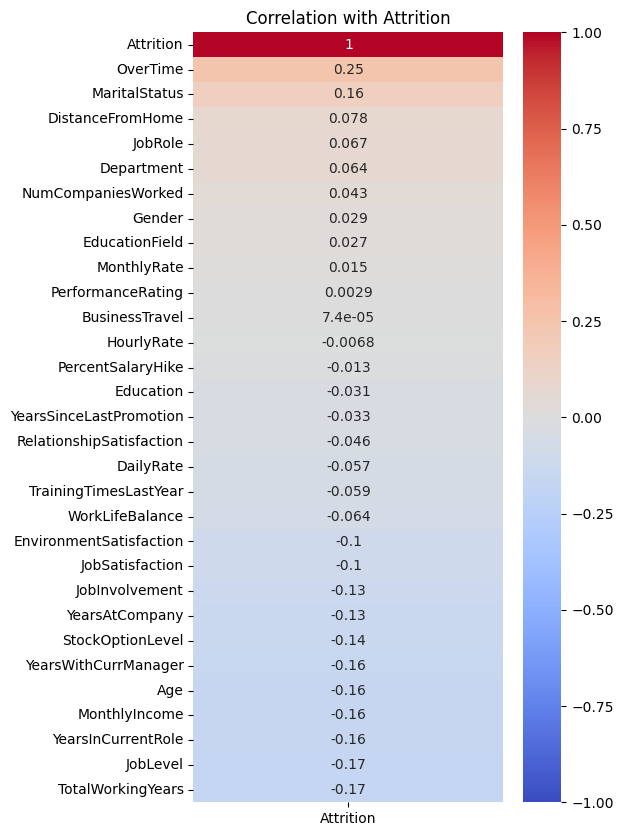

In [56]:

object_cols = df1.select_dtypes(include='object').columns

# Apply label encoding to each object column
for col in object_cols:
    df1[col] = df1[col].astype('category').cat.codes

correlation_matrix = df1.corr()
# Extract correlations of all features with 'Attrition'-
attrition_corr = correlation_matrix[['Attrition']].sort_values(by='Attrition', ascending=False)

# Plot the heatmap focusing on correlation with 'Attrition'-
plt.figure(figsize=(5, 10))
sns.heatmap(attrition_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation with Attrition')
plt.show()

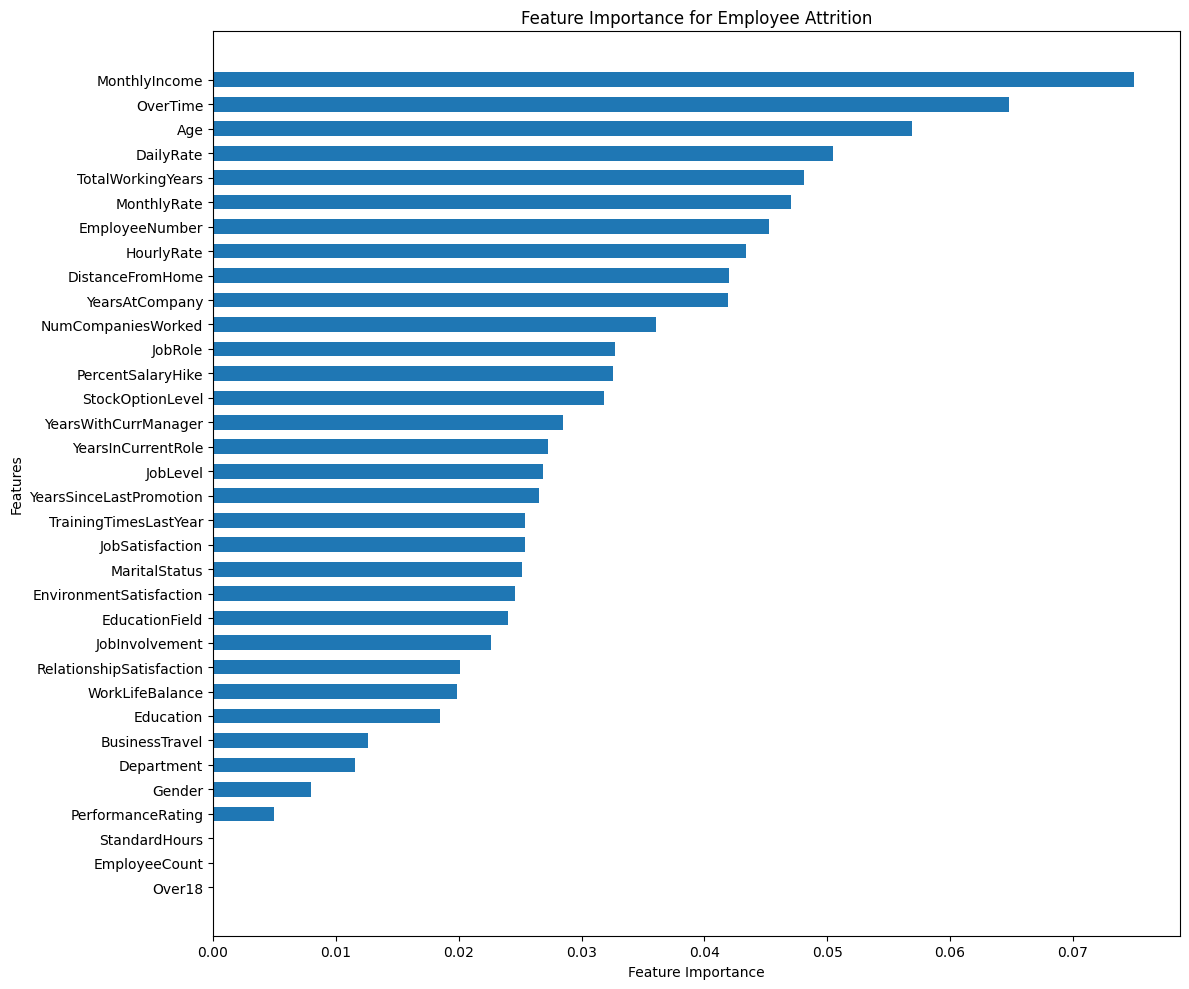

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df2 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode categorical features
categorical_cols = df2.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df2[col] = label_encoders[col].fit_transform(df2[col])

# Define features (X) and target (y)
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot horizontal bar plot for all features with spacing
plt.figure(figsize=(12, 10))
bars = plt.barh(y=feature_importances.index, width=feature_importances.values, height=0.6)
plt.title('Feature Importance for Employee Attrition', ha='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To have the highest importance feature at the top
plt.tight_layout()  # Adjust layout to fit everything better
plt.show()


## pls include till here. Now i will be doing the bivariate


In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df0)
plt.title('DistanceFromHome vs Attrition', fontsize=16, ha='center')
# plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df0['Age'], bins=30, color='limegreen', edgecolor='black')
plt.grid(False) 
plt.title('Histogram for Age Distribution', fontsize=16, ha='center')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='Age', hue='Attrition', bins=10, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')
plt.grid(False) 
plt.title('Histogram for Age Distribution by Attrition', fontsize=16, ha='center')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Education', hue='Attrition', data=df0)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Attrition vs Education Level', fontsize=16, ha='center')
plt.xlabel('Education Level', fontsize=14, ha='center')
plt.ylabel('Count', fontsize=14, ha='center')

plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

df1 = df0[df0['Attrition'] == 'Yes']

education_counts = df1['Education'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Education Level Distribution for Attrition = Yes', fontsize=16, pad=20, ha='center')
plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Create the count plot
sns.set(style="whitegrid")
ax = sns.countplot(x='EducationField', hue='Attrition', data=df0)

# Annotate the bars with the count values
for container in ax.containers:
    ax.bar_label(container)

# Add labels and title
plt.title('Attrition vs EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.show()

education_counts = df1['EducationField'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Education Field Distribution for Attrition = Yes', loc='center')
plt.show()



In [ ]:
# Calculate the percentage of Attrition = Yes within each Education level
df_grouped = df0.groupby('Education')['Attrition'].value_counts(normalize=True).unstack()
df_grouped = df_grouped.fillna(0)  # Handle any missing values

df_grouped = df_grouped * 100
# Create a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('pastel', 2), figsize=(12, 6))

# Add labels and title
plt.title('Percentage of Attrition = Yes within Each Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df_grouped = df0.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack()
df_grouped = df_grouped.fillna(0)  # Handle any missing values
df_grouped = df_grouped * 100

# Create a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('pastel', 2), figsize=(12, 6))

# Add labels and title
plt.title('Percentage of Attrition = Yes within Each Education Field', fontsize=16)
plt.xlabel('Education Field', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.show()



In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df0)
plt.title('Marital vs Attrition', ha='center')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=df0, palette=['red', 'green'])
plt.title('DistanceFromHom vs Attrition vs Money')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



                                                                Monetary Factors

In [ ]:
df5 = df0[df0['DailyRate'] == 0]

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='DailyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.title('Daily Rate Distribution by Attrition', fontsize=16, ha='center', pad=20)
plt.xlabel('Daily Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust the layout
plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='HourlyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.title('Hourly Rate Distribution by Attrition', fontsize=16, ha='center', pad=20)
plt.xlabel('Hourly Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='MonthlyRate', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.title('Monthly Rate Distribution by Attrition', fontsize=16, ha='center', pad=20)
plt.xlabel('Monthly Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

#NOT MUCH COULD BE SAID ABOUT DAILY RATES<< HOURLY RATES AND MONTHLY RATES AS THE ATTRITION RATES ARE NOT FORMING A DISTINCTIVE PATTERN.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='MonthlyIncome', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')
plt.title('Attrition vs MonthlyIncome', ha='center')
plt.xlabel('Monthly Income')
plt.tight_layout()
plt.show()

##STRONG CORRELATION CAN  BE OBSERVED HERE. THE HIGHEST LEVELS OF ATTRITION ARE BETWEEN 2000-3000 AND DECREASING GRADUALLY WHICH SUGGESTS THAT MONTHLY 
# INCOME COULD BE ONE OF THE MOST SIGNIFICANT FACTOR FOR ATTRITION. 

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='JobSatisfaction', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')
plt.title('Attrition vs MonthlyIncome', ha='center')
plt.xlabel('Monthly Income')
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data to only include rows where Attrition is 'Yes'
attrition_yes = df0[df0['Attrition'] == 'Yes']

# Group by 'JobSatisfaction' and count the occurrences
attrition_counts = attrition_yes.groupby('JobSatisfaction')['Attrition'].count().reset_index()
attrition_counts.columns = ['JobSatisfaction', 'Attrition_Count']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='JobSatisfaction', hue='Attrition', data=df0)

# Overlay the counts on the scatter plot
for _, row in attrition_counts.iterrows():
    plt.text(df0['MonthlyIncome'].max() * 0.8,  # Adjust x position
             row['JobSatisfaction'] - 0.1,  # Adjust y position to be lower
             f'Count: {row["Attrition_Count"]}', 
             fontsize=10, color='red', va='center', ha='left')

# Add labels and title
plt.title('Scatter Plot of Monthly Income vs Job Satisfaction with Attrition Counts', fontsize=16, ha='center')
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.tight_layout()

plt.show()


# Attrition wrt to Job satisfaction is evenly distributed when compared with the likes of monthly income. 
# Job Satisfaction might not be a dominant factor here.
# Another observation is that attrition rate is higher in lower levels of income at all jonb satisfaction levels.
# So, Monthly Income actually has the potential to be the most dominant factor for attrition.
# Lets dig deeper with Job Satisfaction vs Department.

In [ ]:
# Filter the data to only include rows where Attrition is 'Yes'
attrition_yes = df0[df0['Attrition'] == 'Yes']

# Group by 'Department' and 'JobSatisfaction' and count the occurrences
attrition_counts = attrition_yes.groupby(['Department', 'JobSatisfaction']).size().reset_index(name='Attrition_Count')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Department', y='JobSatisfaction', hue='Attrition', data=df0)

# Overlay the counts on the scatter plot
for i in range(attrition_counts.shape[0]):
    plt.text(attrition_counts['Department'][i], 
             attrition_counts['JobSatisfaction'][i] - 0.1,  # Adjust y-axis position
             f'Count: {attrition_counts["Attrition_Count"][i]}', 
             fontsize=10, color='red', ha='center')

# Add labels and title
plt.title('Scatter Plot of Department vs Job Satisfaction with Attrition Counts', fontsize=16, ha='center')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.tight_layout()

plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of Monthly Income vs Department', fontsize=16,ha='center')
plt.xlabel('Monthly Income', fontsize=10)
plt.ylabel('Department', fontsize=14)
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 0.63), loc='upper center')
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatisfaction', y='WorkLifeBalance', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobSatisfaction vs WorkLifeBalance', fontsize=16, ha='center' )
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='StandardHours', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')
plt.title('Standard Hours vs Attrition', ha='center')
plt.tight_layout()
plt.show()

std_hrs = df0['StandardHours'].unique()
std_hrs_int = std_hrs.astype(int)
print("standard working hours = " + str(std_hrs_int))

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='OverTime', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')
plt.title('OverTime vs Attrition', fontsize=16, pad=10)
plt.xlabel('Overtime', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

overtime = df0['OverTime'].unique()
print("standard working hours = " + str(overtime))

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='JobLevel', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

plt.title('Job Level vs Attrition', ha='center')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
sns.histplot(data=df0, x='JobRole', hue='Attrition', bins=30, multiple='dodge', 
             palette={'Yes': 'limegreen', 'No': 'dodgerblue'}, edgecolor='black')

In [ ]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobRole vs MonthlyIncome', fontsize=16)
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatisfaction', y='EnvironmentSatisfaction', hue='Attrition', data=df0)

# Add labels and title
plt.title('Scatter Plot of JobRole vs MonthlyIncome', fontsize=16, ha='center' )
plt.xlabel('JS', fontsize=10)
plt.ylabel('WB', fontsize=14)
plt.tight_layout()
plt.show()

need joblevel vd money
overtime vs money